In [1]:
from reComBat import reComBat


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
cts = pd.read_csv("trainign_dataset_51280_microarray_unadjusted.csv")
metadata =  pd.read_csv("Samples_age_class.csv")
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts



/tmp/ipykernel_409340/453810311.py:8: DtypeWarning: Columns (51279) have mixed types. Specify dtype option on import or set low_memory=False.
  cts = pd.read_csv("trainign_dataset_51280_microarray_unadjusted.csv")


In [3]:
experiment_order = []  # Store the corresponding experiment for each sample
for sample in sample_order:
    experiment = metadata.loc[metadata['Geo_accession'] == sample, 'Experiment'].values[0]
    experiment_order.append(experiment)

In [4]:
# Step 2: Perform spectral clustering
age_order = []  # Store the corresponding experiment for each sample
for sample in sample_order:
    age = metadata.loc[metadata['Geo_accession'] == sample, 'Unnamed: 9'].values[0]
    age_order.append(age)

In [7]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Age,Sex,Status,Experiment
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,52.50,Male,IRd,GSE13070
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,50.60,Male,IRd,GSE13070
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,56.08,Male,IRd � TZD,GSE13070
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,54.84,Male,IRd � TZD,GSE13070
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,51.14,Male,IRd,GSE13070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,NaN,NaN,NaN,NaN,NaN,NaN,65.10,Female,NaN,GSE9676
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,NaN,NaN,NaN,NaN,NaN,NaN,68.40,Female,NaN,GSE9676
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,65.90,Female,NaN,GSE9676
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,NaN,NaN,NaN,NaN,NaN,NaN,67.30,Female,NaN,GSE9676


In [53]:
cts = cts.set_index("Sample")

cts.fillna(0, inplace=True)

In [55]:
cts.columns

Index(['U48705', 'M87338', 'X51757', 'X69699', 'L36861', 'L13852', 'X55005',
       'X79510', 'M21121', 'J02843',
       ...
       'AI571298', 'AA149545', 'C18318', 'AI219073', 'AI205180', 'AI363375',
       'Age', 'Sex', 'Status', 'Experiment'],
      dtype='object', length=51280)

In [57]:
cts_process=cts.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1)

In [58]:
cts_process

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,168.000000,...,500.200012,878.599976,14.600000,387.500000,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000
GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,191.600006,...,197.699997,672.400024,78.400002,556.799988,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012
GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,65.500000,...,226.300003,433.399994,22.100000,604.400024,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006
GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,127.199997,...,32.299999,572.400024,115.400002,533.099976,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994
GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,145.000000,...,942.200012,904.500000,9.400000,580.799988,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,2498.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,1764.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,2197.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Adjusting with reCombat

In [59]:
experiment_order= pd.Series(experiment_order)
combat = reComBat()
combat.fit(cts_process,experiment_order)
reCombat_adjusted = combat.transform(cts_process,experiment_order)

[reComBat] 2024-02-22 15:32:48,848 Starting to fot reComBat.
[reComBat] 2024-02-22 15:32:48,880 Fit the linear model.
[reComBat] 2024-02-22 15:32:53,318 Starting the empirical parametric optimisation.
/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/reComBat-main/reComBat/utils.py:83: RuntimeWarning: divide by zero encountered in true_divide
  np.max(np.abs(delta_star_squared_new_i-delta_star_squared_i)/delta_star_squared_i)])
[reComBat] 2024-02-22 15:32:54,510 Optimisation finished.
[reComBat] 2024-02-22 15:32:54,511 reComBat is fitted.
[reComBat] 2024-02-22 15:32:54,512 Starting to transform.
[reComBat] 2024-02-22 15:32:55,166 Transform finished.


In [60]:
reCombat_adjusted.index


Index(['GSM342608', 'GSM342609', 'GSM342610', 'GSM342611', 'GSM342614',
       'GSM342615', 'GSM342616', 'GSM342617', 'GSM342620', 'GSM342621',
       ...
       'GSM244607', 'GSM244608', 'GSM244609', 'GSM244610', 'GSM244611',
       'GSM244612', 'GSM244613', 'GSM244614', 'GSM244615', 'GSM244616'],
      dtype='object', name='Sample', length=777)

In [32]:
metadata.columns

Index(['Age', 'Years', 'Sex', 'Geo_accession', 'Experiment', 'Status',
       'Average', 'Practical_age/SDV', 'PracticalAge_group', 'Unnamed: 9',
       'Base-Control-Healty', 'Exclude', 'Include', 'Sex.1', 'Age_sex'],
      dtype='object')

In [72]:
metadata_short=metadata[["Geo_accession","Experiment", "Sex.1","PracticalAge_group", "Status"]]
metadata_short.set_index("Geo_accession", inplace=True)
metadata_short

,Experiment,Sex.1,PracticalAge_group,Status
Geo_accession,,,,
GSM342683,GSE13070,unknow,45.51,NRd
GSM342689,GSE13070,Male,43.39,NRd
GSM342690,GSE13070,Male,43.37,NRd
GSM342695,GSE13070,Male,44.40,NRd
GSM342696,GSE13070,Male,42.45,NRd
...,...,...,...,...
GSM244597,GSE9676,Male,73.50,NaN
GSM244539,GSE9676,Male,74.50,NaN
GSM244599,GSE9676,Male,74.50,NaN


In [74]:
adjuested_data_full = pd.concat([reCombat_adjusted, metadata_short], axis=1)

In [73]:
unadjested_data_full= pd.concat([cts_process, metadata_short], axis=1)

In [76]:
adjuested_data_full.columns[10:]

Index(['X75208', 'L38487', 'M33318', 'NM_005505', 'NM_015140', 'NM_052871',
       'NM_080735', 'NM_138957', 'NM_145004', 'NM_138796',
       ...
       'AI571298', 'AA149545', 'C18318', 'AI219073', 'AI205180', 'AI363375',
       'Experiment', 'Sex.1', 'PracticalAge_group', 'Status'],
      dtype='object', length=51270)

In [77]:
adjuested_data_full.to_csv("trainign_dataset_51270_microarray_adjusted.csv")

In [78]:
unadjested_data_full.to_csv("trainign_dataset_51270_microarray_unadjusted.csv")

Looking at reCombat plotting

In [10]:
X = reCombat_adjusted.values 

In [11]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


Using tSNE


In [12]:
from sklearn.manifold import TSNE
X = reCombat_adjusted.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

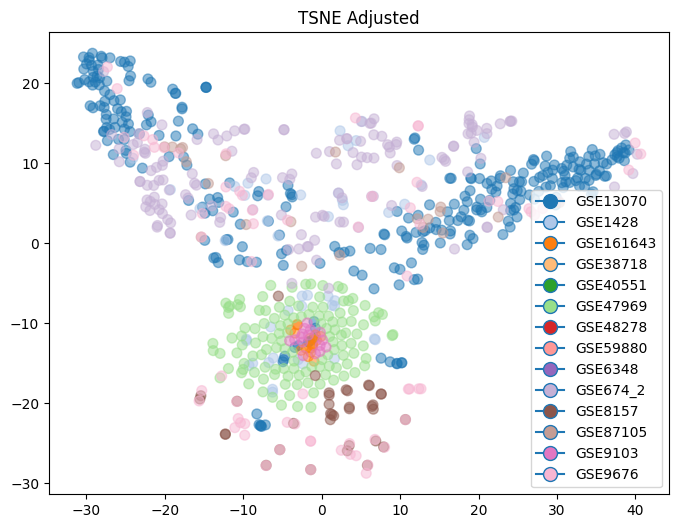

In [13]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_reCombat.jpg")

Using PCA

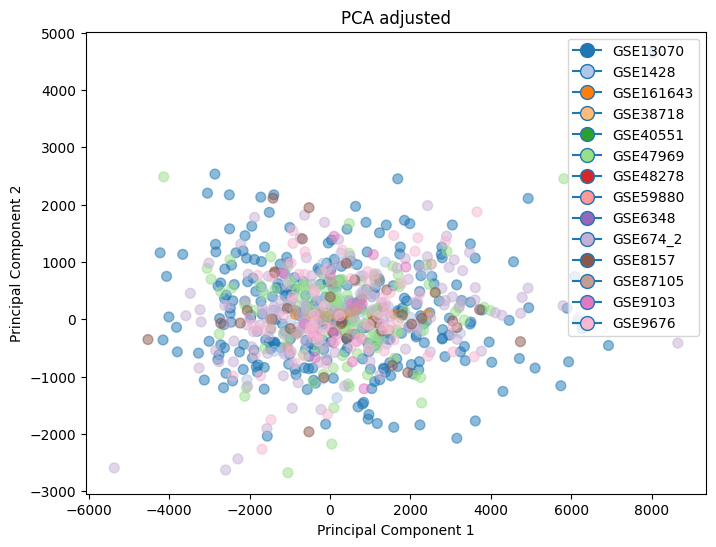

In [14]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_reCombat.jpg")

Lookign at the age

In [15]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


tSNE

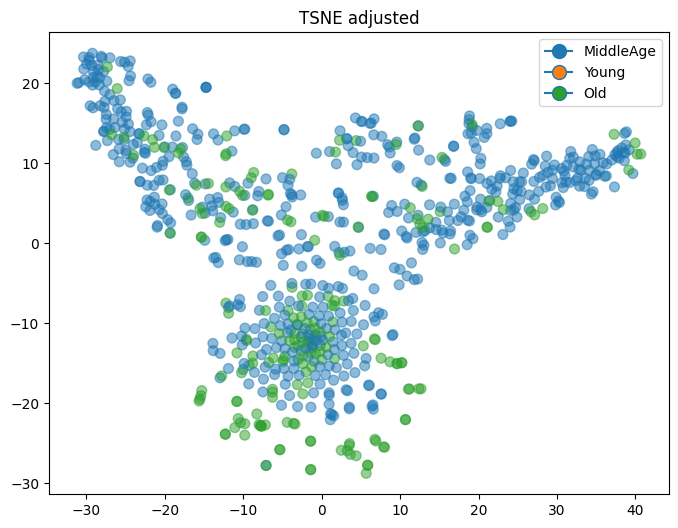

In [16]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

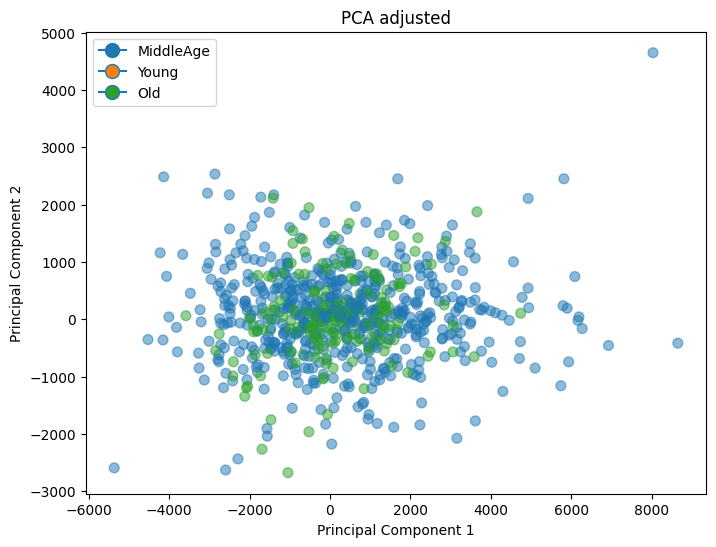

In [17]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [18]:
X = cts.values 


tSNE by experiment

In [19]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [20]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

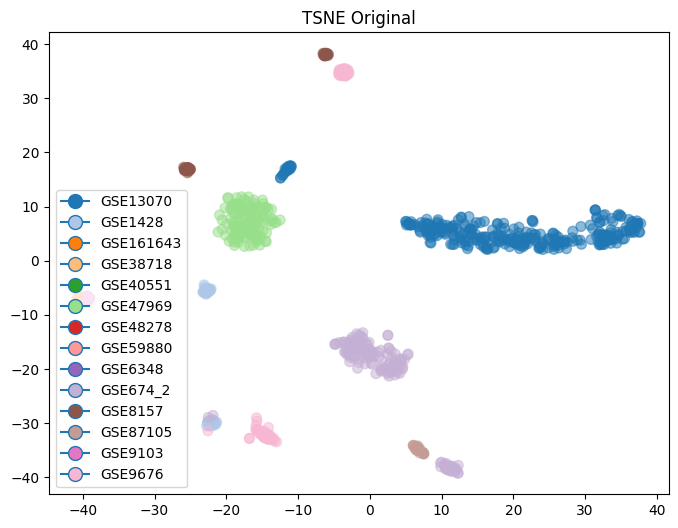

In [21]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

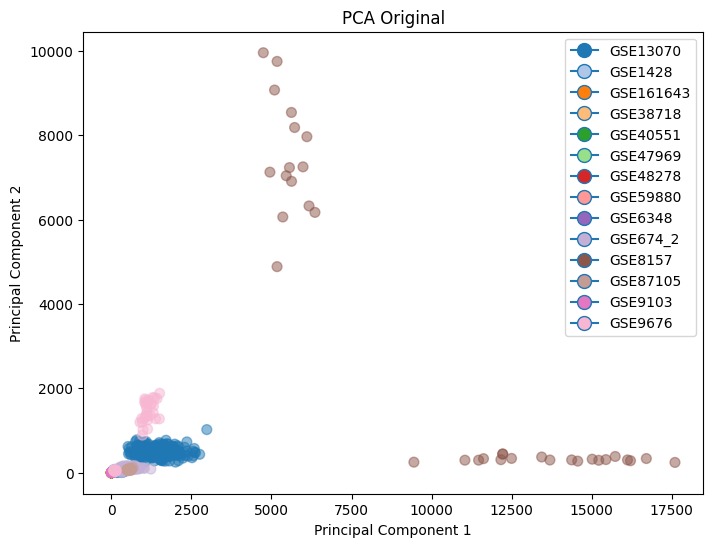

In [22]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [23]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

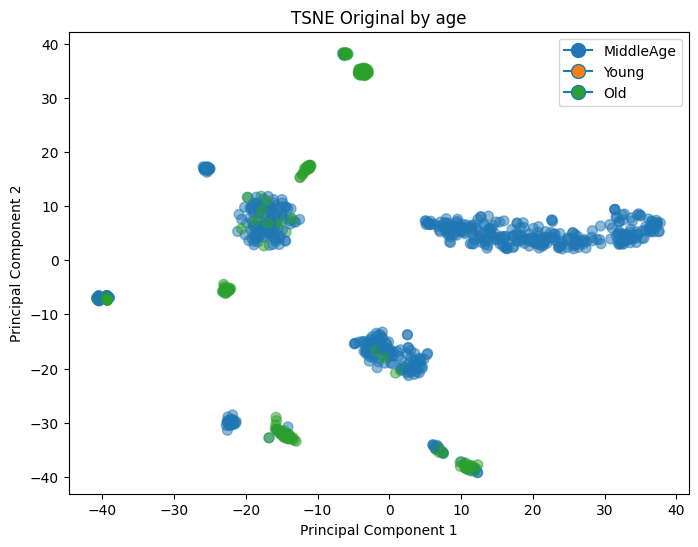

In [24]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

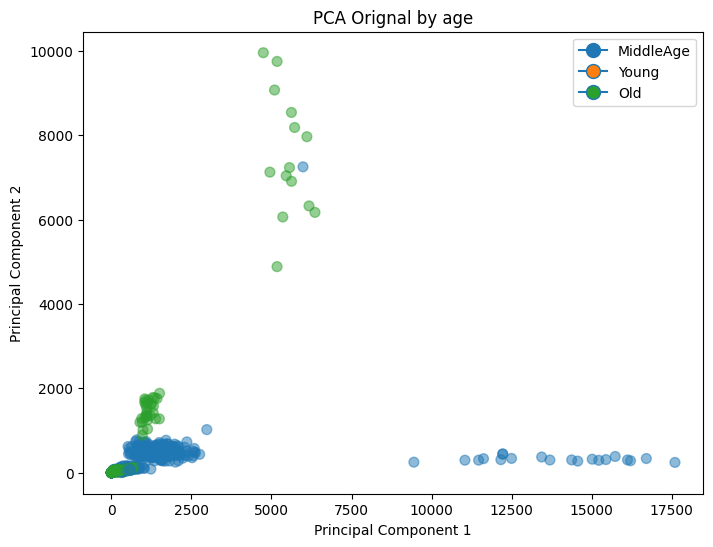

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP

In [26]:
import umap


/home/karen/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/karen/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/karen/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The '